In [10]:
import numpy as np
import pygame
import h5py
import gameboardClass
import agentClass

PARAM_TASK1a=1
PARAM_TASK1b=2
PARAM_TASK1c=3
PARAM_TASK1d=4
PARAM_TASK2a=5
PARAM_TASK2b=6

# Choose to control the game yourself ('human_player=1') to test the setups in the different tasks
human_player=0
#human_player=1

# Choose parameter sets for different tasks
param_set=PARAM_TASK1a
#param_set=PARAM_TASK1b
#param_set=PARAM_TASK1c
#param_set=PARAM_TASK1d
#param_set=PARAM_TASK2a
#param_set=PARAM_TASK2b

# Use files to evaluate strategy
# If you change 'strategy_file' to the location of a file containing a stored Q-table or Q-network, you can evaluate the success of the found strategy
if param_set==PARAM_TASK1a:
    strategy_file=''
elif param_set==PARAM_TASK1b:
    strategy_file=''
elif param_set==PARAM_TASK1c:
    strategy_file=''
elif param_set==PARAM_TASK2a:
    strategy_file=''
elif param_set==PARAM_TASK2b:
    strategy_file=''

if strategy_file:
    evaluate_agent=1
    human_player=1
else:
    evaluate_agent=0


# The code below initializes the game parameters for the task selected by 'param_set'
# Game parameters: 
# 'N_row' and 'N_col' (integers) gives the size of the game board.
# 'tile_size' (2 or 4) denotes whether the small tile set (2) or the large tile set (4) should be used
# 'max_tile_count' (integer) denotes the maximal number of tiles to be placed in one game
# 'stochastic_prob' (float between 0 and 1) denotes the probability to take a random tile. When stochastic_prob=0 tiles are taken according to a predefined sequence, when stochastic_prob=1 all tiles are random. For values 0<stochastic_prob<1 there is a mixture between deterministic and random tiles

# Training parameters:
# 'alpha' is learning rate in Q-learning or for the stochastic gradient descent in deep Q-networks
# 'epsilon' is probability to choose random action in epsilon-greedy policy
# 'episode_count' is the number of epsiodes a training session lasts

# Additional training parameters for deep Q-networks:
# 'epsilon_scale' is the scale of the episode number where epsilon_N changes from unity to epsilon
# 'replay_buffer_size' is the size of the experience replay buffer
# 'batch_size' is the number of samples taken from the experience replay buffer each update
# 'sync_target_episode_count' is the number of epsiodes between synchronisations of the target network
if param_set==PARAM_TASK1a:
    N_row=4
    N_col=4
    tile_size=2
    max_tile_count=50
    stochastic_prob=0

    alpha=0.2
    epsilon=0
    episode_count=1000

    if (not human_player) or evaluate_agent:
        agent=agentClass.TQAgent(alpha,epsilon,episode_count)
elif param_set==PARAM_TASK1b:
    N_row=4
    N_col=4
    tile_size=2
    max_tile_count=50
    stochastic_prob=0

    alpha=0.2
    epsilon=0.001
    episode_count=10000

    if (not human_player) or evaluate_agent:
        agent=agentClass.TQAgent(alpha,epsilon,episode_count)
elif param_set==PARAM_TASK1c:
    N_row=4
    N_col=4
    tile_size=2
    max_tile_count=50
    stochastic_prob=1

    alpha=0.2
    epsilon=0.001
    episode_count=200000

    if (not human_player) or evaluate_agent:
        agent=agentClass.TQAgent(alpha,epsilon,episode_count)
elif param_set==PARAM_TASK1d:
    N_row=8
    N_col=8
    tile_size=4
    max_tile_count=50
    stochastic_prob=1

    alpha=0.2
    epsilon=0.001
    episode_count=200000

    if (not human_player) or evaluate_agent:
        agent=agentClass.TQAgent(alpha,epsilon,episode_count)
elif param_set==PARAM_TASK2a:
    N_row=4
    N_col=4
    tile_size=2
    max_tile_count=50
    stochastic_prob=1

    alpha=0.001
    epsilon=0.001
    episode_count=10000

    epsilon_scale=5000
    replay_buffer_size=10000
    batch_size=32
    sync_target_episode_count=100

    if (not human_player) or evaluate_agent:
        agent=agentClass.TDQNAgent(alpha,epsilon,epsilon_scale,replay_buffer_size,batch_size,sync_target_episode_count,episode_count)
elif param_set==PARAM_TASK2b:
    N_row=8
    N_col=8
    tile_size=4
    max_tile_count=50
    stochastic_prob=1

    alpha=0.001
    epsilon=0.001
    episode_count=10000

    epsilon_scale=50000

    replay_buffer_size=10000
    batch_size=32
    sync_target_episode_count=100

    if (not human_player) or evaluate_agent:
        agent=agentClass.TDQNAgent(alpha,epsilon,epsilon_scale,replay_buffer_size,batch_size,sync_target_episode_count,episode_count)
else:
    print('Erroneouse param_set. Terminating...')
    raise SystemExit(0)

# The remaining code below is implementation of the game. You don't need to change anything below this line

if evaluate_agent:
    agent_evaluate=agent;
if human_player:
    agent=agentClass.THumanAgent()
        
gameboard=gameboardClass.TGameBoard(N_row,N_col,tile_size,max_tile_count,agent,stochastic_prob)

if evaluate_agent:
    agent_evaluate.epsilon=0
    agent_evaluate.fn_init(gameboard)
    agent_evaluate.fn_load_strategy(strategy_file)

if isinstance(gameboard.agent,agentClass.THumanAgent):
    # The player is human

    # Define some colors for painting
    COLOR_BLACK = (0, 0, 0)
    COLOR_GREY = (128, 128, 128)
    COLOR_WHITE = (255, 255, 255)
    COLOR_RED =  (255, 0, 0)

    # Initialize the game engine
    pygame.init()
    screen=pygame.display.set_mode((200+N_col*20,150+N_row*20))
    clock=pygame.time.Clock()
    pygame.key.set_repeat(300,100)
    pygame.display.set_caption('Turn-based tetris')
    font=pygame.font.SysFont('Calibri',25,True)
    fontLarge=pygame.font.SysFont('Calibri',50,True)
    framerate=0;

    # Loop until the window is closed
    while True:
        if isinstance(gameboard.agent,agentClass.THumanAgent):
            gameboard.agent.fn_turn(pygame)
        else:
            pygame.event.pump()
            for event in pygame.event.get():
                if event.type==pygame.KEYDOWN:
                    if event.key==pygame.K_SPACE:
                        if framerate > 0:
                            framerate=0
                        else:
                            framerate=10
                    if (event.key==pygame.K_LEFT) and (framerate>1):
                        framerate-=1
                    if event.key==pygame.K_RIGHT:
                        framerate+=1
            gameboard.agent.fn_turn()

        if evaluate_agent:
            agent_evaluate.fn_read_state()
            agent_evaluate.fn_select_action()

        if pygame.display.get_active():
            # Paint game board
            screen.fill(COLOR_WHITE)

            for i in range(gameboard.N_row):
                for j in range(gameboard.N_col):
                    pygame.draw.rect(screen,COLOR_GREY,[100+20*j,80+20*(gameboard.N_row-i),20,20],1)
                    if gameboard.board[i][j] > 0:
                        pygame.draw.rect(screen,COLOR_BLACK,[101+20*j,81+20*(gameboard.N_row-i),18,18])

            if gameboard.cur_tile_type is not None:
                curTile=gameboard.tiles[gameboard.cur_tile_type][gameboard.tile_orientation]
                for xLoop in range(len(curTile)):
                    for yLoop in range(curTile[xLoop][0],curTile[xLoop][1]):
                        pygame.draw.rect(screen,COLOR_RED,[101+20*((xLoop+gameboard.tile_x)%gameboard.N_col),81+20*(gameboard.N_row-(yLoop+gameboard.tile_y)),18,18])

            screen.blit(font.render("Reward: "+str(agent.reward_tots[agent.episode]),True,COLOR_BLACK),[0,0])
            screen.blit(font.render("Tile "+str(gameboard.tile_count)+"/"+str(gameboard.max_tile_count),True,COLOR_BLACK),[0,20])
            if framerate>0:
                screen.blit(font.render("FPS: "+str(framerate),True,COLOR_BLACK),[320,0])
            screen.blit(font.render("Reward: "+str(agent.reward_tots[agent.episode]),True,COLOR_BLACK),[0,0])
            if gameboard.gameover:
                screen.blit(fontLarge.render("Game Over", True,COLOR_RED), [80, 200])
                screen.blit(font.render("Press ESC to try again", True,COLOR_RED), [85, 265])

            pygame.display.flip()
            clock.tick(framerate)
else:
    # The player is AI
    while True:
        gameboard.agent.fn_turn()

episode 100/1000 (reward:  -88.34 )
episode 200/1000 (reward:  -28.31 )
episode 300/1000 (reward:  79.0 )
episode 400/1000 (reward:  79.0 )
episode 500/1000 (reward:  79.0 )
episode 600/1000 (reward:  79.0 )
episode 700/1000 (reward:  79.0 )
episode 800/1000 (reward:  79.0 )
episode 900/1000 (reward:  79.0 )
episode 1000/1000 (reward:  79.0 )
Saving data at episode 1000
Current working directory: c:\Users\metho\Desktop\高级机器学习\作业\HWB


SystemExit: 0

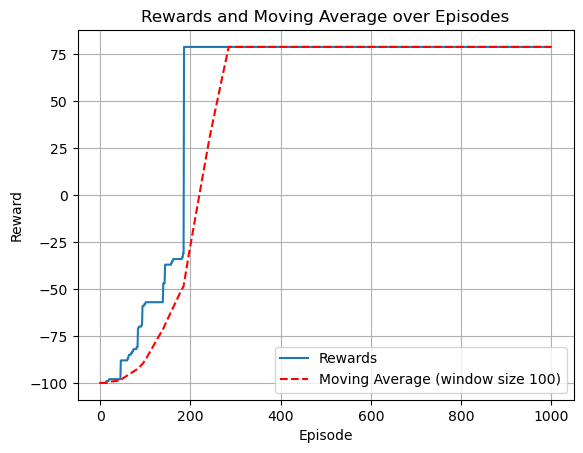

In [13]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

filename = "Data_1000.h5"

with h5py.File(filename, 'r') as hf:
    rewards = np.array(hf['rewards'])

plt.plot(rewards, label='Rewards')

window_size = 100
moving_averages = []

for i in range(len(rewards)):
    if i < window_size:

        moving_averages.append(np.mean(rewards[:i+1]))
    else:

        moving_averages.append(np.mean(rewards[i-window_size+1:i+1]))


moving_averages = np.array(moving_averages)


plt.plot(moving_averages, label='Moving Average (window size 100)', linestyle='--', color='red')

plt.title('Rewards and Moving Average over Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)

plt.show()


In [6]:
import numpy as np
import pygame
import h5py
import gameboardClass
import agentClass

PARAM_TASK1a=1
PARAM_TASK1b=2
PARAM_TASK1c=3
PARAM_TASK1d=4
PARAM_TASK2a=5
PARAM_TASK2b=6

# Choose to control the game yourself ('human_player=1') to test the setups in the different tasks
human_player=0
#human_player=1

# Choose parameter sets for different tasks
#param_set=PARAM_TASK1a
param_set=PARAM_TASK1b
#param_set=PARAM_TASK1c
#param_set=PARAM_TASK1d
#param_set=PARAM_TASK2a
#param_set=PARAM_TASK2b

# Use files to evaluate strategy
# If you change 'strategy_file' to the location of a file containing a stored Q-table or Q-network, you can evaluate the success of the found strategy
if param_set==PARAM_TASK1a:
    strategy_file=''
elif param_set==PARAM_TASK1b:
    strategy_file=''
elif param_set==PARAM_TASK1c:
    strategy_file=''
elif param_set==PARAM_TASK2a:
    strategy_file=''
elif param_set==PARAM_TASK2b:
    strategy_file=''

if strategy_file:
    evaluate_agent=1
    human_player=1
else:
    evaluate_agent=0


# The code below initializes the game parameters for the task selected by 'param_set'
# Game parameters: 
# 'N_row' and 'N_col' (integers) gives the size of the game board.
# 'tile_size' (2 or 4) denotes whether the small tile set (2) or the large tile set (4) should be used
# 'max_tile_count' (integer) denotes the maximal number of tiles to be placed in one game
# 'stochastic_prob' (float between 0 and 1) denotes the probability to take a random tile. When stochastic_prob=0 tiles are taken according to a predefined sequence, when stochastic_prob=1 all tiles are random. For values 0<stochastic_prob<1 there is a mixture between deterministic and random tiles

# Training parameters:
# 'alpha' is learning rate in Q-learning or for the stochastic gradient descent in deep Q-networks
# 'epsilon' is probability to choose random action in epsilon-greedy policy
# 'episode_count' is the number of epsiodes a training session lasts

# Additional training parameters for deep Q-networks:
# 'epsilon_scale' is the scale of the episode number where epsilon_N changes from unity to epsilon
# 'replay_buffer_size' is the size of the experience replay buffer
# 'batch_size' is the number of samples taken from the experience replay buffer each update
# 'sync_target_episode_count' is the number of epsiodes between synchronisations of the target network
if param_set==PARAM_TASK1a:
    N_row=4
    N_col=4
    tile_size=2
    max_tile_count=50
    stochastic_prob=0

    alpha=0.2
    epsilon=0
    episode_count=1000

    if (not human_player) or evaluate_agent:
        agent=agentClass.TQAgent(alpha,epsilon,episode_count)
elif param_set==PARAM_TASK1b:
    N_row=4
    N_col=4
    tile_size=2
    max_tile_count=50
    stochastic_prob=0

    alpha=0.2
    epsilon=0.001
    episode_count=10000

    if (not human_player) or evaluate_agent:
        agent=agentClass.TQAgent(alpha,epsilon,episode_count)
elif param_set==PARAM_TASK1c:
    N_row=4
    N_col=4
    tile_size=2
    max_tile_count=50
    stochastic_prob=1

    alpha=0.2
    epsilon=0.001
    episode_count=200000

    if (not human_player) or evaluate_agent:
        agent=agentClass.TQAgent(alpha,epsilon,episode_count)
elif param_set==PARAM_TASK1d:
    N_row=8
    N_col=8
    tile_size=4
    max_tile_count=50
    stochastic_prob=1

    alpha=0.2
    epsilon=0.001
    episode_count=200000

    if (not human_player) or evaluate_agent:
        agent=agentClass.TQAgent(alpha,epsilon,episode_count)
elif param_set==PARAM_TASK2a:
    N_row=4
    N_col=4
    tile_size=2
    max_tile_count=50
    stochastic_prob=1

    alpha=0.001
    epsilon=0.001
    episode_count=10000

    epsilon_scale=5000
    replay_buffer_size=10000
    batch_size=32
    sync_target_episode_count=100

    if (not human_player) or evaluate_agent:
        agent=agentClass.TDQNAgent(alpha,epsilon,epsilon_scale,replay_buffer_size,batch_size,sync_target_episode_count,episode_count)
elif param_set==PARAM_TASK2b:
    N_row=8
    N_col=8
    tile_size=4
    max_tile_count=50
    stochastic_prob=1

    alpha=0.001
    epsilon=0.001
    episode_count=10000

    epsilon_scale=50000

    replay_buffer_size=10000
    batch_size=32
    sync_target_episode_count=100

    if (not human_player) or evaluate_agent:
        agent=agentClass.TDQNAgent(alpha,epsilon,epsilon_scale,replay_buffer_size,batch_size,sync_target_episode_count,episode_count)
else:
    print('Erroneouse param_set. Terminating...')
    raise SystemExit(0)

# The remaining code below is implementation of the game. You don't need to change anything below this line

if evaluate_agent:
    agent_evaluate=agent;
if human_player:
    agent=agentClass.THumanAgent()
        
gameboard=gameboardClass.TGameBoard(N_row,N_col,tile_size,max_tile_count,agent,stochastic_prob)

if evaluate_agent:
    agent_evaluate.epsilon=0
    agent_evaluate.fn_init(gameboard)
    agent_evaluate.fn_load_strategy(strategy_file)

if isinstance(gameboard.agent,agentClass.THumanAgent):
    # The player is human

    # Define some colors for painting
    COLOR_BLACK = (0, 0, 0)
    COLOR_GREY = (128, 128, 128)
    COLOR_WHITE = (255, 255, 255)
    COLOR_RED =  (255, 0, 0)

    # Initialize the game engine
    pygame.init()
    screen=pygame.display.set_mode((200+N_col*20,150+N_row*20))
    clock=pygame.time.Clock()
    pygame.key.set_repeat(300,100)
    pygame.display.set_caption('Turn-based tetris')
    font=pygame.font.SysFont('Calibri',25,True)
    fontLarge=pygame.font.SysFont('Calibri',50,True)
    framerate=0;

    # Loop until the window is closed
    while True:
        if isinstance(gameboard.agent,agentClass.THumanAgent):
            gameboard.agent.fn_turn(pygame)
        else:
            pygame.event.pump()
            for event in pygame.event.get():
                if event.type==pygame.KEYDOWN:
                    if event.key==pygame.K_SPACE:
                        if framerate > 0:
                            framerate=0
                        else:
                            framerate=10
                    if (event.key==pygame.K_LEFT) and (framerate>1):
                        framerate-=1
                    if event.key==pygame.K_RIGHT:
                        framerate+=1
            gameboard.agent.fn_turn()

        if evaluate_agent:
            agent_evaluate.fn_read_state()
            agent_evaluate.fn_select_action()

        if pygame.display.get_active():
            # Paint game board
            screen.fill(COLOR_WHITE)

            for i in range(gameboard.N_row):
                for j in range(gameboard.N_col):
                    pygame.draw.rect(screen,COLOR_GREY,[100+20*j,80+20*(gameboard.N_row-i),20,20],1)
                    if gameboard.board[i][j] > 0:
                        pygame.draw.rect(screen,COLOR_BLACK,[101+20*j,81+20*(gameboard.N_row-i),18,18])

            if gameboard.cur_tile_type is not None:
                curTile=gameboard.tiles[gameboard.cur_tile_type][gameboard.tile_orientation]
                for xLoop in range(len(curTile)):
                    for yLoop in range(curTile[xLoop][0],curTile[xLoop][1]):
                        pygame.draw.rect(screen,COLOR_RED,[101+20*((xLoop+gameboard.tile_x)%gameboard.N_col),81+20*(gameboard.N_row-(yLoop+gameboard.tile_y)),18,18])

            screen.blit(font.render("Reward: "+str(agent.reward_tots[agent.episode]),True,COLOR_BLACK),[0,0])
            screen.blit(font.render("Tile "+str(gameboard.tile_count)+"/"+str(gameboard.max_tile_count),True,COLOR_BLACK),[0,20])
            if framerate>0:
                screen.blit(font.render("FPS: "+str(framerate),True,COLOR_BLACK),[320,0])
            screen.blit(font.render("Reward: "+str(agent.reward_tots[agent.episode]),True,COLOR_BLACK),[0,0])
            if gameboard.gameover:
                screen.blit(fontLarge.render("Game Over", True,COLOR_RED), [80, 200])
                screen.blit(font.render("Press ESC to try again", True,COLOR_RED), [85, 265])

            pygame.display.flip()
            clock.tick(framerate)
else:
    # The player is AI
    while True:
        gameboard.agent.fn_turn()

episode 100/10000 (reward:  -88.34 )
episode 200/10000 (reward:  -31.73 )
episode 300/10000 (reward:  72.41 )
episode 400/10000 (reward:  71.62 )
episode 500/10000 (reward:  72.97 )
episode 600/10000 (reward:  68.8 )
episode 700/10000 (reward:  74.73 )
episode 800/10000 (reward:  73.06 )
episode 900/10000 (reward:  70.36 )
episode 1000/10000 (reward:  73.01 )
Saving data at episode 1000
Current working directory: c:\Users\metho\Desktop\高级机器学习\作业\HWB
episode 1100/10000 (reward:  72.19 )
episode 1200/10000 (reward:  70.99 )
episode 1300/10000 (reward:  69.7 )
episode 1400/10000 (reward:  74.1 )
episode 1500/10000 (reward:  76.5 )
episode 1600/10000 (reward:  72.47 )
episode 1700/10000 (reward:  71.12 )
episode 1800/10000 (reward:  75.61 )
episode 1900/10000 (reward:  73.79 )
episode 2000/10000 (reward:  73.17 )
Saving data at episode 2000
Current working directory: c:\Users\metho\Desktop\高级机器学习\作业\HWB
episode 2100/10000 (reward:  73.7 )
episode 2200/10000 (reward:  76.76 )
episode 2300/1

SystemExit: 0

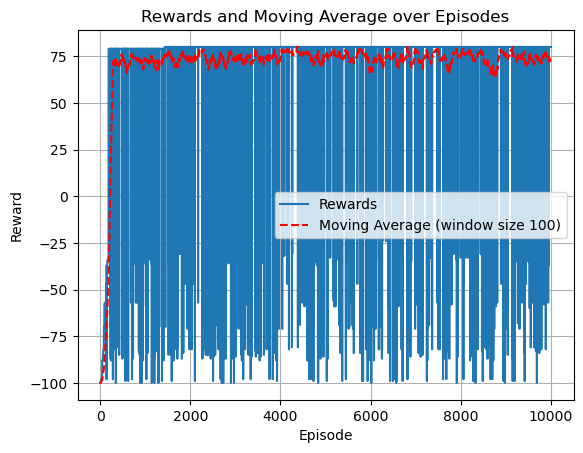

In [14]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

filename = "Data_10000.h5"

with h5py.File(filename, 'r') as hf:
    rewards = np.array(hf['rewards'])

plt.plot(rewards, label='Rewards')

window_size = 100
moving_averages = []

for i in range(len(rewards)):
    if i < window_size:
        
        moving_averages.append(np.mean(rewards[:i+1]))
    else:

        moving_averages.append(np.mean(rewards[i-window_size+1:i+1]))

moving_averages = np.array(moving_averages)

plt.plot(moving_averages, label='Moving Average (window size 100)', linestyle='--', color='red')

plt.title('Rewards and Moving Average over Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)

plt.show()

In [20]:
import numpy as np
import pygame
import h5py
import gameboardClass
import agentClass

PARAM_TASK1a=1
PARAM_TASK1b=2
PARAM_TASK1c=3
PARAM_TASK1d=4
PARAM_TASK2a=5
PARAM_TASK2b=6

# Choose to control the game yourself ('human_player=1') to test the setups in the different tasks
human_player=0
#human_player=1

# Choose parameter sets for different tasks
#param_set=PARAM_TASK1a
#param_set=PARAM_TASK1b
param_set=PARAM_TASK1c
#param_set=PARAM_TASK1d
#param_set=PARAM_TASK2a
#param_set=PARAM_TASK2b

# Use files to evaluate strategy
# If you change 'strategy_file' to the location of a file containing a stored Q-table or Q-network, you can evaluate the success of the found strategy
if param_set==PARAM_TASK1a:
    strategy_file=''
elif param_set==PARAM_TASK1b:
    strategy_file=''
elif param_set==PARAM_TASK1c:
    strategy_file=''
elif param_set==PARAM_TASK2a:
    strategy_file=''
elif param_set==PARAM_TASK2b:
    strategy_file=''

if strategy_file:
    evaluate_agent=1
    human_player=1
else:
    evaluate_agent=0


# The code below initializes the game parameters for the task selected by 'param_set'
# Game parameters: 
# 'N_row' and 'N_col' (integers) gives the size of the game board.
# 'tile_size' (2 or 4) denotes whether the small tile set (2) or the large tile set (4) should be used
# 'max_tile_count' (integer) denotes the maximal number of tiles to be placed in one game
# 'stochastic_prob' (float between 0 and 1) denotes the probability to take a random tile. When stochastic_prob=0 tiles are taken according to a predefined sequence, when stochastic_prob=1 all tiles are random. For values 0<stochastic_prob<1 there is a mixture between deterministic and random tiles

# Training parameters:
# 'alpha' is learning rate in Q-learning or for the stochastic gradient descent in deep Q-networks
# 'epsilon' is probability to choose random action in epsilon-greedy policy
# 'episode_count' is the number of epsiodes a training session lasts

# Additional training parameters for deep Q-networks:
# 'epsilon_scale' is the scale of the episode number where epsilon_N changes from unity to epsilon
# 'replay_buffer_size' is the size of the experience replay buffer
# 'batch_size' is the number of samples taken from the experience replay buffer each update
# 'sync_target_episode_count' is the number of epsiodes between synchronisations of the target network
if param_set==PARAM_TASK1a:
    N_row=4
    N_col=4
    tile_size=2
    max_tile_count=50
    stochastic_prob=0

    alpha=0.2
    epsilon=0
    episode_count=1000

    if (not human_player) or evaluate_agent:
        agent=agentClass.TQAgent(alpha,epsilon,episode_count)
elif param_set==PARAM_TASK1b:
    N_row=4
    N_col=4
    tile_size=2
    max_tile_count=50
    stochastic_prob=0

    alpha=0.2
    epsilon=0.001
    episode_count=10000

    if (not human_player) or evaluate_agent:
        agent=agentClass.TQAgent(alpha,epsilon,episode_count)
elif param_set==PARAM_TASK1c:
    N_row=4
    N_col=4
    tile_size=2
    max_tile_count=50
    stochastic_prob=1

    alpha=0.2
    epsilon=0.001
    episode_count=200000

    if (not human_player) or evaluate_agent:
        agent=agentClass.TQAgent(alpha,epsilon,episode_count)
elif param_set==PARAM_TASK1d:
    N_row=8
    N_col=8
    tile_size=4
    max_tile_count=50
    stochastic_prob=1

    alpha=0.2
    epsilon=0.001
    episode_count=200000

    if (not human_player) or evaluate_agent:
        agent=agentClass.TQAgent(alpha,epsilon,episode_count)
elif param_set==PARAM_TASK2a:
    N_row=4
    N_col=4
    tile_size=2
    max_tile_count=50
    stochastic_prob=1

    alpha=0.001
    epsilon=0.001
    episode_count=10000

    epsilon_scale=5000
    replay_buffer_size=10000
    batch_size=32
    sync_target_episode_count=100

    if (not human_player) or evaluate_agent:
        agent=agentClass.TDQNAgent(alpha,epsilon,epsilon_scale,replay_buffer_size,batch_size,sync_target_episode_count,episode_count)
elif param_set==PARAM_TASK2b:
    N_row=8
    N_col=8
    tile_size=4
    max_tile_count=50
    stochastic_prob=1

    alpha=0.001
    epsilon=0.001
    episode_count=10000

    epsilon_scale=50000

    replay_buffer_size=10000
    batch_size=32
    sync_target_episode_count=100

    if (not human_player) or evaluate_agent:
        agent=agentClass.TDQNAgent(alpha,epsilon,epsilon_scale,replay_buffer_size,batch_size,sync_target_episode_count,episode_count)
else:
    print('Erroneouse param_set. Terminating...')
    raise SystemExit(0)

# The remaining code below is implementation of the game. You don't need to change anything below this line

if evaluate_agent:
    agent_evaluate=agent;
if human_player:
    agent=agentClass.THumanAgent()
        
gameboard=gameboardClass.TGameBoard(N_row,N_col,tile_size,max_tile_count,agent,stochastic_prob)

if evaluate_agent:
    agent_evaluate.epsilon=0
    agent_evaluate.fn_init(gameboard)
    agent_evaluate.fn_load_strategy(strategy_file)

if isinstance(gameboard.agent,agentClass.THumanAgent):
    # The player is human

    # Define some colors for painting
    COLOR_BLACK = (0, 0, 0)
    COLOR_GREY = (128, 128, 128)
    COLOR_WHITE = (255, 255, 255)
    COLOR_RED =  (255, 0, 0)

    # Initialize the game engine
    pygame.init()
    screen=pygame.display.set_mode((200+N_col*20,150+N_row*20))
    clock=pygame.time.Clock()
    pygame.key.set_repeat(300,100)
    pygame.display.set_caption('Turn-based tetris')
    font=pygame.font.SysFont('Calibri',25,True)
    fontLarge=pygame.font.SysFont('Calibri',50,True)
    framerate=0;

    # Loop until the window is closed
    while True:
        if isinstance(gameboard.agent,agentClass.THumanAgent):
            gameboard.agent.fn_turn(pygame)
        else:
            pygame.event.pump()
            for event in pygame.event.get():
                if event.type==pygame.KEYDOWN:
                    if event.key==pygame.K_SPACE:
                        if framerate > 0:
                            framerate=0
                        else:
                            framerate=10
                    if (event.key==pygame.K_LEFT) and (framerate>1):
                        framerate-=1
                    if event.key==pygame.K_RIGHT:
                        framerate+=1
            gameboard.agent.fn_turn()

        if evaluate_agent:
            agent_evaluate.fn_read_state()
            agent_evaluate.fn_select_action()

        if pygame.display.get_active():
            # Paint game board
            screen.fill(COLOR_WHITE)

            for i in range(gameboard.N_row):
                for j in range(gameboard.N_col):
                    pygame.draw.rect(screen,COLOR_GREY,[100+20*j,80+20*(gameboard.N_row-i),20,20],1)
                    if gameboard.board[i][j] > 0:
                        pygame.draw.rect(screen,COLOR_BLACK,[101+20*j,81+20*(gameboard.N_row-i),18,18])

            if gameboard.cur_tile_type is not None:
                curTile=gameboard.tiles[gameboard.cur_tile_type][gameboard.tile_orientation]
                for xLoop in range(len(curTile)):
                    for yLoop in range(curTile[xLoop][0],curTile[xLoop][1]):
                        pygame.draw.rect(screen,COLOR_RED,[101+20*((xLoop+gameboard.tile_x)%gameboard.N_col),81+20*(gameboard.N_row-(yLoop+gameboard.tile_y)),18,18])

            screen.blit(font.render("Reward: "+str(agent.reward_tots[agent.episode]),True,COLOR_BLACK),[0,0])
            screen.blit(font.render("Tile "+str(gameboard.tile_count)+"/"+str(gameboard.max_tile_count),True,COLOR_BLACK),[0,20])
            if framerate>0:
                screen.blit(font.render("FPS: "+str(framerate),True,COLOR_BLACK),[320,0])
            screen.blit(font.render("Reward: "+str(agent.reward_tots[agent.episode]),True,COLOR_BLACK),[0,0])
            if gameboard.gameover:
                screen.blit(fontLarge.render("Game Over", True,COLOR_RED), [80, 200])
                screen.blit(font.render("Press ESC to try again", True,COLOR_RED), [85, 265])

            pygame.display.flip()
            clock.tick(framerate)
else:
    # The player is AI
    while True:
        gameboard.agent.fn_turn()

episode 100/200000 (reward:  -99.62 )
episode 200/200000 (reward:  -99.57 )
episode 300/200000 (reward:  -99.11 )
episode 400/200000 (reward:  -98.69 )
episode 500/200000 (reward:  -98.91 )
episode 600/200000 (reward:  -98.41 )
episode 700/200000 (reward:  -98.02 )
episode 800/200000 (reward:  -97.88 )
episode 900/200000 (reward:  -97.33 )
episode 1000/200000 (reward:  -97.26 )
Saving data at episode 1000
Current working directory: c:\Users\metho\Desktop\高级机器学习\作业\HWB
episode 1100/200000 (reward:  -97.48 )
episode 1200/200000 (reward:  -96.98 )
episode 1300/200000 (reward:  -97.87 )
episode 1400/200000 (reward:  -98.05 )
episode 1500/200000 (reward:  -97.64 )
episode 1600/200000 (reward:  -96.2 )
episode 1700/200000 (reward:  -97.86 )
episode 1800/200000 (reward:  -97.39 )
episode 1900/200000 (reward:  -96.79 )
episode 2000/200000 (reward:  -98.13 )
Saving data at episode 2000
Current working directory: c:\Users\metho\Desktop\高级机器学习\作业\HWB
episode 2100/200000 (reward:  -97.09 )
episode

SystemExit: 0

c:\Users\metho\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


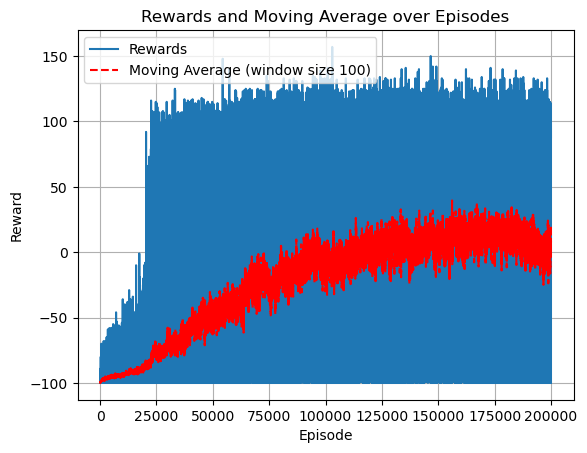

In [21]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

filename = "Data_200000.h5"

with h5py.File(filename, 'r') as hf:
    rewards = np.array(hf['rewards'])

plt.plot(rewards, label='Rewards')

window_size = 100
moving_averages = []

for i in range(len(rewards)):
    if i < window_size:

        moving_averages.append(np.mean(rewards[:i+1]))
    else:

        moving_averages.append(np.mean(rewards[i-window_size+1:i+1]))

moving_averages = np.array(moving_averages)

plt.plot(moving_averages, label='Moving Average (window size 100)', linestyle='--', color='red')

plt.title('Rewards and Moving Average over Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)

plt.show()

In [1]:
import numpy as np
import pygame
import h5py
import gameboardClass
import agentClass

PARAM_TASK1a=1
PARAM_TASK1b=2
PARAM_TASK1c=3
PARAM_TASK1d=4
PARAM_TASK2a=5
PARAM_TASK2b=6

# Choose to control the game yourself ('human_player=1') to test the setups in the different tasks
human_player=0
#human_player=1

# Choose parameter sets for different tasks
#param_set=PARAM_TASK1a
#param_set=PARAM_TASK1b
#param_set=PARAM_TASK1c
#param_set=PARAM_TASK1d
param_set=PARAM_TASK2a
#param_set=PARAM_TASK2b

# Use files to evaluate strategy
# If you change 'strategy_file' to the location of a file containing a stored Q-table or Q-network, you can evaluate the success of the found strategy
if param_set==PARAM_TASK1a:
    strategy_file=''
elif param_set==PARAM_TASK1b:
    strategy_file=''
elif param_set==PARAM_TASK1c:
    strategy_file=''
elif param_set==PARAM_TASK2a:
    strategy_file=''
elif param_set==PARAM_TASK2b:
    strategy_file=''

if strategy_file:
    evaluate_agent=1
    human_player=1
else:
    evaluate_agent=0


# The code below initializes the game parameters for the task selected by 'param_set'
# Game parameters: 
# 'N_row' and 'N_col' (integers) gives the size of the game board.
# 'tile_size' (2 or 4) denotes whether the small tile set (2) or the large tile set (4) should be used
# 'max_tile_count' (integer) denotes the maximal number of tiles to be placed in one game
# 'stochastic_prob' (float between 0 and 1) denotes the probability to take a random tile. When stochastic_prob=0 tiles are taken according to a predefined sequence, when stochastic_prob=1 all tiles are random. For values 0<stochastic_prob<1 there is a mixture between deterministic and random tiles

# Training parameters:
# 'alpha' is learning rate in Q-learning or for the stochastic gradient descent in deep Q-networks
# 'epsilon' is probability to choose random action in epsilon-greedy policy
# 'episode_count' is the number of epsiodes a training session lasts

# Additional training parameters for deep Q-networks:
# 'epsilon_scale' is the scale of the episode number where epsilon_N changes from unity to epsilon
# 'replay_buffer_size' is the size of the experience replay buffer
# 'batch_size' is the number of samples taken from the experience replay buffer each update
# 'sync_target_episode_count' is the number of epsiodes between synchronisations of the target network
if param_set==PARAM_TASK1a:
    N_row=4
    N_col=4
    tile_size=2
    max_tile_count=50
    stochastic_prob=0

    alpha=0.2
    epsilon=0
    episode_count=1000

    if (not human_player) or evaluate_agent:
        agent=agentClass.TQAgent(alpha,epsilon,episode_count)
elif param_set==PARAM_TASK1b:
    N_row=4
    N_col=4
    tile_size=2
    max_tile_count=50
    stochastic_prob=0

    alpha=0.2
    epsilon=0.001
    episode_count=10000

    if (not human_player) or evaluate_agent:
        agent=agentClass.TQAgent(alpha,epsilon,episode_count)
elif param_set==PARAM_TASK1c:
    N_row=4
    N_col=4
    tile_size=2
    max_tile_count=50
    stochastic_prob=1

    alpha=0.2
    epsilon=0.001
    episode_count=200000

    if (not human_player) or evaluate_agent:
        agent=agentClass.TQAgent(alpha,epsilon,episode_count)
elif param_set==PARAM_TASK1d:
    N_row=8
    N_col=8
    tile_size=4
    max_tile_count=50
    stochastic_prob=1

    alpha=0.2
    epsilon=0.001
    episode_count=200000

    if (not human_player) or evaluate_agent:
        agent=agentClass.TQAgent(alpha,epsilon,episode_count)
elif param_set==PARAM_TASK2a:
    N_row=4
    N_col=4
    tile_size=2
    max_tile_count=50
    stochastic_prob=1

    alpha=0.001
    epsilon=0.001
    episode_count=10000

    epsilon_scale=5000
    replay_buffer_size=10000
    batch_size=32
    sync_target_episode_count=100

    if (not human_player) or evaluate_agent:
        agent=agentClass.TDQNAgent(alpha,epsilon,epsilon_scale,replay_buffer_size,batch_size,sync_target_episode_count,episode_count)
elif param_set==PARAM_TASK2b:
    N_row=8
    N_col=8
    tile_size=4
    max_tile_count=50
    stochastic_prob=1

    alpha=0.001
    epsilon=0.001
    episode_count=10000

    epsilon_scale=50000

    replay_buffer_size=10000
    batch_size=32
    sync_target_episode_count=100

    if (not human_player) or evaluate_agent:
        agent=agentClass.TDQNAgent(alpha,epsilon,epsilon_scale,replay_buffer_size,batch_size,sync_target_episode_count,episode_count)
else:
    print('Erroneouse param_set. Terminating...')
    raise SystemExit(0)

# The remaining code below is implementation of the game. You don't need to change anything below this line

if evaluate_agent:
    agent_evaluate=agent;
if human_player:
    agent=agentClass.THumanAgent()
        
gameboard=gameboardClass.TGameBoard(N_row,N_col,tile_size,max_tile_count,agent,stochastic_prob)

if evaluate_agent:
    agent_evaluate.epsilon=0
    agent_evaluate.fn_init(gameboard)
    agent_evaluate.fn_load_strategy(strategy_file)

if isinstance(gameboard.agent,agentClass.THumanAgent):
    # The player is human

    # Define some colors for painting
    COLOR_BLACK = (0, 0, 0)
    COLOR_GREY = (128, 128, 128)
    COLOR_WHITE = (255, 255, 255)
    COLOR_RED =  (255, 0, 0)

    # Initialize the game engine
    pygame.init()
    screen=pygame.display.set_mode((200+N_col*20,150+N_row*20))
    clock=pygame.time.Clock()
    pygame.key.set_repeat(300,100)
    pygame.display.set_caption('Turn-based tetris')
    font=pygame.font.SysFont('Calibri',25,True)
    fontLarge=pygame.font.SysFont('Calibri',50,True)
    framerate=0;

    # Loop until the window is closed
    while True:
        if isinstance(gameboard.agent,agentClass.THumanAgent):
            gameboard.agent.fn_turn(pygame)
        else:
            pygame.event.pump()
            for event in pygame.event.get():
                if event.type==pygame.KEYDOWN:
                    if event.key==pygame.K_SPACE:
                        if framerate > 0:
                            framerate=0
                        else:
                            framerate=10
                    if (event.key==pygame.K_LEFT) and (framerate>1):
                        framerate-=1
                    if event.key==pygame.K_RIGHT:
                        framerate+=1
            gameboard.agent.fn_turn()

        if evaluate_agent:
            agent_evaluate.fn_read_state()
            agent_evaluate.fn_select_action()

        if pygame.display.get_active():
            # Paint game board
            screen.fill(COLOR_WHITE)

            for i in range(gameboard.N_row):
                for j in range(gameboard.N_col):
                    pygame.draw.rect(screen,COLOR_GREY,[100+20*j,80+20*(gameboard.N_row-i),20,20],1)
                    if gameboard.board[i][j] > 0:
                        pygame.draw.rect(screen,COLOR_BLACK,[101+20*j,81+20*(gameboard.N_row-i),18,18])

            if gameboard.cur_tile_type is not None:
                curTile=gameboard.tiles[gameboard.cur_tile_type][gameboard.tile_orientation]
                for xLoop in range(len(curTile)):
                    for yLoop in range(curTile[xLoop][0],curTile[xLoop][1]):
                        pygame.draw.rect(screen,COLOR_RED,[101+20*((xLoop+gameboard.tile_x)%gameboard.N_col),81+20*(gameboard.N_row-(yLoop+gameboard.tile_y)),18,18])

            screen.blit(font.render("Reward: "+str(agent.reward_tots[agent.episode]),True,COLOR_BLACK),[0,0])
            screen.blit(font.render("Tile "+str(gameboard.tile_count)+"/"+str(gameboard.max_tile_count),True,COLOR_BLACK),[0,20])
            if framerate>0:
                screen.blit(font.render("FPS: "+str(framerate),True,COLOR_BLACK),[320,0])
            screen.blit(font.render("Reward: "+str(agent.reward_tots[agent.episode]),True,COLOR_BLACK),[0,0])
            if gameboard.gameover:
                screen.blit(fontLarge.render("Game Over", True,COLOR_RED), [80, 200])
                screen.blit(font.render("Press ESC to try again", True,COLOR_RED), [85, 265])

            pygame.display.flip()
            clock.tick(framerate)
else:
    # The player is AI
    while True:
        gameboard.agent.fn_turn()

pygame 2.2.0 (SDL 2.30.2, Python 3.11.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
episode 100/10000 (reward:  -99.64 )
episode 200/10000 (reward:  -99.71 )
episode 300/10000 (reward:  -99.71 )
episode 400/10000 (reward:  -99.84 )
episode 500/10000 (reward:  -99.38 )
episode 600/10000 (reward:  -99.64 )
episode 700/10000 (reward:  -99.83 )
episode 800/10000 (reward:  -99.34 )
episode 900/10000 (reward:  -99.82 )
episode 1000/10000 (reward:  -99.65 )
episode 1100/10000 (reward:  -99.66 )
episode 1200/10000 (reward:  -99.76 )
episode 1300/10000 (reward:  -99.65 )
episode 1400/10000 (reward:  -99.6 )
episode 1500/10000 (reward:  -98.96 )
episode 1600/10000 (reward:  -99.67 )
episode 1700/10000 (reward:  -99.47 )
episode 1800/10000 (reward:  -99.53 )
episode 1900/10000 (reward:  -99.51 )
episode 2000/10000 (reward:  -99.41 )
episode 2100/10000 (reward:  -99.4 )
episode 2200/10000 (reward:  -99.48 )
episode 2300/10000 (reward:  -99.15 )
episode 2400/10000 (rewa

SystemExit: 0

c:\Users\metho\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


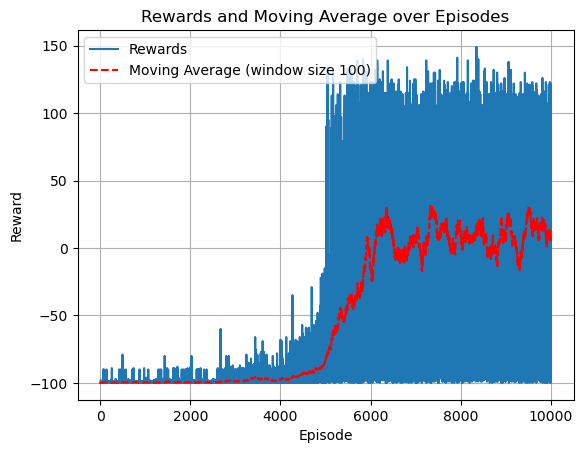

In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np


filename = "Data_10000.h5"


with h5py.File(filename, 'r') as hf:
    rewards = np.array(hf['rewards'])


plt.plot(rewards, label='Rewards')


window_size = 100
moving_averages = []

for i in range(len(rewards)):
    if i < window_size:

        moving_averages.append(np.mean(rewards[:i+1]))
    else:
        
        moving_averages.append(np.mean(rewards[i-window_size+1:i+1]))

moving_averages = np.array(moving_averages)

plt.plot(moving_averages, label='Moving Average (window size 100)', linestyle='--', color='red')

plt.title('Rewards and Moving Average over Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)

plt.show()